# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 626


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"
api_key = "febd2770d00609d417d6828395b6a694"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url)
        response.raise_for_status()
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | wewak
Processing Record 3 of Set 1 | isangel
Processing Record 4 of Set 1 | ilulissat
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | victoria
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | port mathurin
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | lihue
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | rongelap
Processing Record 14 of Set 1 | aasiaat
Processing Record 15 of Set 1 | stanley
Processing Record 16 of Set 1 | susuman
Processing Record 17 of Set 1 | tolanaro
Processing Record 18 of Set 1 | novyy urengoy
Processing Record 19 of Set 1 | ugoofaaru
Processing Record 20 of Set 1 | uturoa
Processing Record 21 of Set 1 | saipan
Processing Record 22 of Set 1 | puerto san carlos
City not found. Skipping...
Pro

Processing Record 41 of Set 4 | nemuro
Processing Record 42 of Set 4 | lucheng
Processing Record 43 of Set 4 | chajul
Processing Record 44 of Set 4 | nar'yan-mar
Processing Record 45 of Set 4 | valparai
Processing Record 46 of Set 4 | boende
Processing Record 47 of Set 4 | posse
Processing Record 48 of Set 4 | natal
Processing Record 49 of Set 4 | christchurch
Processing Record 0 of Set 5 | grand-popo
Processing Record 1 of Set 5 | petropavlovsk-kamchatsky
Processing Record 2 of Set 5 | harper
Processing Record 3 of Set 5 | cuprija
Processing Record 4 of Set 5 | najran
Processing Record 5 of Set 5 | jiexiu
Processing Record 6 of Set 5 | tranovaho
City not found. Skipping...
Processing Record 7 of Set 5 | gbadolite
Processing Record 8 of Set 5 | zanjan
Processing Record 9 of Set 5 | saratamata
City not found. Skipping...
Processing Record 10 of Set 5 | gueckedou
Processing Record 11 of Set 5 | dryden
Processing Record 12 of Set 5 | marang
Processing Record 13 of Set 5 | thap than
Proces

Processing Record 32 of Set 8 | yangor
City not found. Skipping...
Processing Record 33 of Set 8 | manta
Processing Record 34 of Set 8 | poso
Processing Record 35 of Set 8 | zhanaozen
Processing Record 36 of Set 8 | punta del este
Processing Record 37 of Set 8 | okha
Processing Record 38 of Set 8 | remire-montjoly
Processing Record 39 of Set 8 | puerto deseado
Processing Record 40 of Set 8 | 'ohonua
City not found. Skipping...
Processing Record 41 of Set 8 | guiuan
Processing Record 42 of Set 8 | tacna
Processing Record 43 of Set 8 | howrah
Processing Record 44 of Set 8 | veraval
Processing Record 45 of Set 8 | hof
Processing Record 46 of Set 8 | am timan
Processing Record 47 of Set 8 | dikwa
Processing Record 48 of Set 8 | mhamid
Processing Record 49 of Set 8 | turan
Processing Record 0 of Set 9 | nandurbar
Processing Record 1 of Set 9 | kismayo
Processing Record 2 of Set 9 | barkly west
Processing Record 3 of Set 9 | hadibu
Processing Record 4 of Set 9 | amuntai
Processing Record 5 o

Processing Record 20 of Set 12 | new norfolk
Processing Record 21 of Set 12 | hotan
Processing Record 22 of Set 12 | mashava
Processing Record 23 of Set 12 | mulanje
Processing Record 24 of Set 12 | almaty
Processing Record 25 of Set 12 | salacgriva
Processing Record 26 of Set 12 | floro
Processing Record 27 of Set 12 | port lincoln
Processing Record 28 of Set 12 | ust'-ilimsk
Processing Record 29 of Set 12 | pinotepa nacional
Processing Record 30 of Set 12 | dobrush
Processing Record 31 of Set 12 | zaysan
Processing Record 32 of Set 12 | savanna-la-mar
Processing Record 33 of Set 12 | kikwit
Processing Record 34 of Set 12 | okuchi-shinohara
Processing Record 35 of Set 12 | aver-o-mar
Processing Record 36 of Set 12 | khandyga
Processing Record 37 of Set 12 | viedma
Processing Record 38 of Set 12 | novoishimskiy
Processing Record 39 of Set 12 | solleftea
Processing Record 40 of Set 12 | gargzdai
Processing Record 41 of Set 12 | kagoro
Processing Record 42 of Set 12 | naryshkino
Processi

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          599
Lat           599
Lng           599
Max Temp      599
Humidity      599
Cloudiness    599
Wind Speed    599
Country       599
Date          599
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,280.11,86,74,2.39,AU,1690908499
1,wewak,-3.5534,143.6268,300.03,86,29,4.11,PG,1690908499
2,isangel,-19.5500,169.2667,293.78,61,48,5.33,VU,1690908500
3,ilulissat,69.2167,-51.1000,283.16,81,40,3.60,GL,1690908500
4,adamstown,-25.0660,-130.1015,293.18,61,97,9.44,PN,1690908500


In [54]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ilulissat,69.2167,-51.1000,278.51,64,83,1.62,GL,1690905410
1,aasiaat,68.7098,-52.8699,276.43,92,98,1.11,GL,1690905410
2,komsomol'skiy,43.9783,46.6985,300.84,41,0,5.78,RU,1690905410
3,bukama,-9.2000,25.8500,303.09,19,26,2.03,CD,1690905712
4,kerikeri,-35.2268,173.9474,285.32,93,69,0.45,NZ,1690905408


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

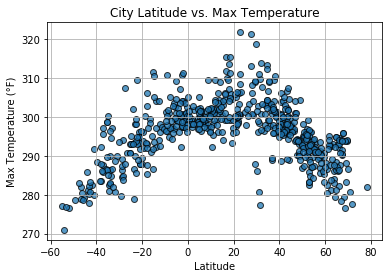

In [9]:
# Build scatter plot for latitude vs. temperature
latitudes = [city["Lat"] for city in city_data]
temperatures = [city["Max Temp"] for city in city_data]
plt.scatter(latitudes, temperatures, marker="o", edgecolors="black", alpha=0.75)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.title("City Latitude vs. Max Temperature")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

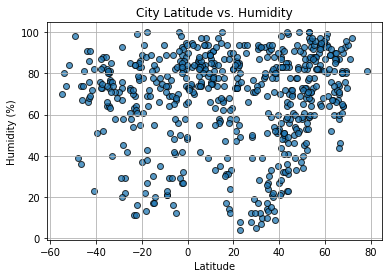

In [10]:
# Build the scatter plots for latitude vs. humidity
latitudes = [city["Lat"] for city in city_data]
humidity = [city["Humidity"] for city in city_data]
plt.scatter(latitudes, humidity, marker="o", edgecolors="black", alpha=0.75)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

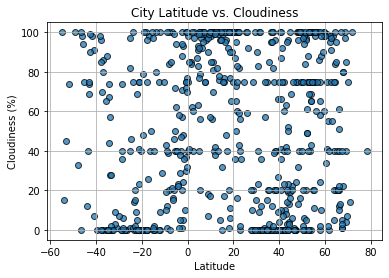

In [11]:
# Build the scatter plots for latitude vs. cloudiness
latitudes = [city["Lat"] for city in city_data]
cloudiness = [city["Cloudiness"] for city in city_data]
plt.scatter(latitudes, cloudiness, marker="o", edgecolors="black", alpha=0.75)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

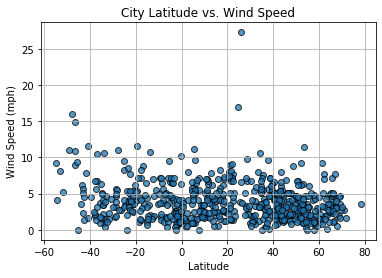

In [12]:
# Build the scatter plots for latitude vs. wind speed
latitudes = [city["Lat"] for city in city_data]
wind_speeds = [city["Wind Speed"] for city in city_data]
plt.scatter(latitudes, wind_speeds, marker="o", edgecolors="black", alpha=0.75)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [53]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_data, y_data, x_label, y_label):

SyntaxError: unexpected EOF while parsing (848517559.py, line 2)

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ilulissat,69.2167,-51.1000,278.51,64,83,1.62,GL,1690905410
1,aasiaat,68.7098,-52.8699,276.43,92,98,1.11,GL,1690905410
2,komsomol'skiy,43.9783,46.6985,300.84,41,0,5.78,RU,1690905410
5,longyearbyen,78.2186,15.6401,283.06,76,40,4.12,SJ,1690905411
6,praia da vitoria,38.7333,-27.0667,302.29,74,20,4.84,PT,1690905411


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,bukama,-9.2000,25.8500,303.09,19,26,2.03,CD,1690905712
4,kerikeri,-35.2268,173.9474,285.32,93,69,0.45,NZ,1690905408
9,urangan,-25.3000,152.9000,291.21,83,0,3.50,AU,1690905412
10,edinburgh of the seven seas,-37.0676,-12.3116,287.68,83,83,11.18,SH,1690905714
11,sao joao da barra,-21.6403,-41.0511,298.20,70,43,4.14,BR,1690905413


###  Temperature vs. Latitude Linear Regression Plot

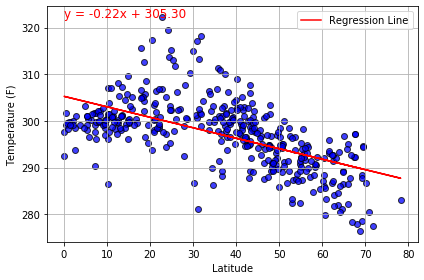

In [43]:
# Linear regression on Northern Hemisphere
def create_linear_regression_plot(x_data, y_data, x_label, y_label):

    slope, intercept = np.polyfit(x_data, y_data, 1)
    regress_values = x_data * slope + intercept

    plt.scatter(x_data, y_data, marker='o', facecolors='blue', edgecolors='black', alpha=0.75)
    plt.plot(x_data, regress_values, "r-", label="Regression Line")

    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(line_eq, (x_data.min(), y_data.max()), fontsize=12, color="red")

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    plt.show()

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
create_linear_regression_plot(x_values, y_values, "Latitude", "Temperature (F)")


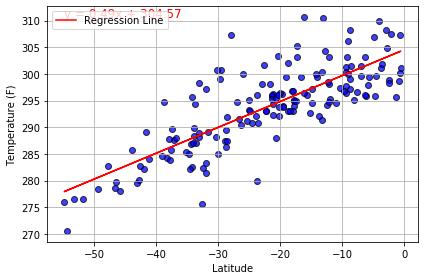

In [44]:
# Linear regression on Southern Hemisphere
def create_linear_regression_plot(x_data, y_data, x_label, y_label):
    slope, intercept = np.polyfit(x_data, y_data, 1)
    regress_values = x_data * slope + intercept

    plt.scatter(x_data, y_data, marker='o', facecolors='blue', edgecolors='black', alpha=0.75)
    plt.plot(x_data, regress_values, "r-", label="Regression Line")

    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(line_eq, (x_data.min(), y_data.max()), fontsize=12, color="red")
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    plt.show()
    
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Max Temp"]
create_linear_regression_plot(x_values_southern, y_values_southern, "Latitude", "Temperature (F)")

**Discussion about the linear relationship:** 
Northern Hemisphere: The regression line shows that as the latitude goes up, the temperature as well goes down. 

Southern Hemisphere: The regression line shows that as the latitude goes down, the temperature goes up. 

In conclusion, the Northern and Southern Hemispheres have opposite effects on temperature. 

### Humidity vs. Latitude Linear Regression Plot

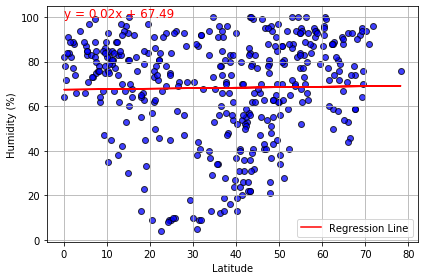

In [45]:
# Northern Hemisphere
def create_linear_regression_plot(x_data, y_data, x_label, y_label):
    slope, intercept = np.polyfit(x_data, y_data, 1)
    regress_values = x_data * slope + intercept

    plt.scatter(x_data, y_data, marker='o', facecolors='blue', edgecolors='black', alpha=0.75)
    plt.plot(x_data, regress_values, "r-", label="Regression Line")

    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(line_eq, (x_data.min(), y_data.max()), fontsize=12, color="red")

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    plt.show()

x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Humidity"]
create_linear_regression_plot(x_values_northern, y_values_northern, "Latitude", "Humidity (%)")

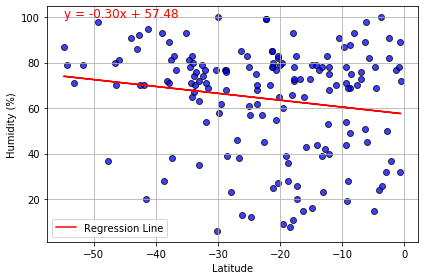

In [47]:
# Southern Hemisphere
def create_linear_regression_plot(x_data, y_data, x_label, y_label):
    slope, intercept = np.polyfit(x_data, y_data, 1)
    regress_values = x_data * slope + intercept

    plt.scatter(x_data, y_data, marker='o', facecolors='blue', edgecolors='black', alpha=0.75)
    plt.plot(x_data, regress_values, "r-", label="Regression Line")

    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(line_eq, (x_data.min(), y_data.max()), fontsize=12, color="red")

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    plt.show()

x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Humidity"]
create_linear_regression_plot(x_values_southern, y_values_southern, "Latitude", "Humidity (%)")

**Discussion about the linear relationship:** 
Northern Hemisphere:  The humidity only slightly goes up as the latitude goes up.

Southern Hemisphere: The humidity goes down has the latitude goes up. 

In conclusion, it makes sense that humidity have the regression lines that were shown, the higher the latitude the less humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

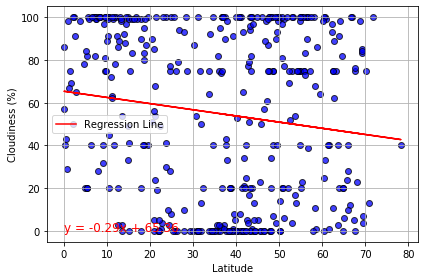

In [48]:
# Northern Hemisphere
def create_linear_regression_plot(x_data, y_data, x_label, y_label):
    slope, intercept = np.polyfit(x_data, y_data, 1)
    regress_values = x_data * slope + intercept

    plt.scatter(x_data, y_data, marker='o', facecolors='blue', edgecolors='black', alpha=0.75)
    plt.plot(x_data, regress_values, "r-", label="Regression Line")

    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(line_eq, (x_data.min(), y_data.min()), fontsize=12, color="red")

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    plt.show()

x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Cloudiness"]
create_linear_regression_plot(x_values_northern, y_values_northern, "Latitude", "Cloudiness (%)")

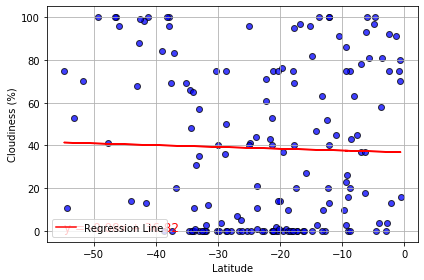

In [49]:
# Southern Hemisphere
def create_linear_regression_plot(x_data, y_data, x_label, y_label):
    slope, intercept = np.polyfit(x_data, y_data, 1)
    regress_values = x_data * slope + intercept

    plt.scatter(x_data, y_data, marker='o', facecolors='blue', edgecolors='black', alpha=0.75)
    plt.plot(x_data, regress_values, "r-", label="Regression Line")

    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(line_eq, (x_data.min(), y_data.min()), fontsize=12, color="red")

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    plt.show()

x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Cloudiness"]
create_linear_regression_plot(x_values_southern, y_values_southern, "Latitude", "Cloudiness (%)")

**Discussion about the linear relationship:** 
Northern Hemisphere:  Cloudiness goes down as latitude goes up.

Southern Hemisphere: Cloudiness only slightly goes down as latitude goes up. 

In conclusion, it seems only in the northern hemisphere is there a very noticeable effect on cloudiness.  

### Wind Speed vs. Latitude Linear Regression Plot

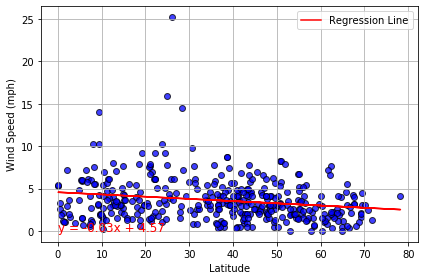

In [50]:
# Northern Hemisphere
def create_linear_regression_plot(x_data, y_data, x_label, y_label):
    slope, intercept = np.polyfit(x_data, y_data, 1)
    regress_values = x_data * slope + intercept

    plt.scatter(x_data, y_data, marker='o', facecolors='blue', edgecolors='black', alpha=0.75)
    plt.plot(x_data, regress_values, "r-", label="Regression Line")

    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(line_eq, (x_data.min(), y_data.min()), fontsize=12, color="red")

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    plt.show()

x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Wind Speed"]
create_linear_regression_plot(x_values_northern, y_values_northern, "Latitude", "Wind Speed (mph)")

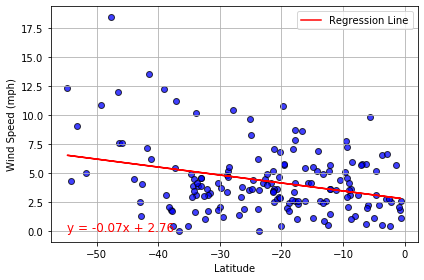

In [51]:
# Southern Hemisphere
def create_linear_regression_plot(x_data, y_data, x_label, y_label):
    slope, intercept = np.polyfit(x_data, y_data, 1)
    regress_values = x_data * slope + intercept

    plt.scatter(x_data, y_data, marker='o', facecolors='blue', edgecolors='black', alpha=0.75)
    plt.plot(x_data, regress_values, "r-", label="Regression Line")

    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(line_eq, (x_data.min(), y_data.min()), fontsize=12, color="red")

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    plt.show()

x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Wind Speed"]
create_linear_regression_plot(x_values_southern, y_values_southern, "Latitude", "Wind Speed (mph)")

**Discussion about the linear relationship:**
Northern Hemisphere:  Wind speed goes down as latitude goes up. 

Southern Hemisphere: Wind speed goes down as latitude goes up. 

In conclusion, the wind speed and latitude relationship of the two hemisphere both go down, but due to difference reasonings (latitude).   